<a href="https://colab.research.google.com/github/omniaghazy/Heart_Disease_Project/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleaned_data.csv')

X = df.drop('num', axis=1)
y = df['num']



In [7]:
print(X.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_2',
       'cp_3', 'cp_4', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_2',
       'slope_3', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')


In [8]:
from sklearn.feature_selection import chi2, SelectKBest

categorical_cols = ['sex_1', 'cp_2',
       'cp_3', 'cp_4', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_2',
       'slope_3', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']

chi_scores = chi2(X[categorical_cols], y)

print("Chi-Square Test Scores (Stat & P-value):")
for feature, score, p_value in zip(categorical_cols, chi_scores[0], chi_scores[1]):
    print(f"{feature:<15}: Score = {score:.2f}, P-value = {p_value:.3f}")

Chi-Square Test Scores (Stat & P-value):
sex_1          : Score = 7.43, P-value = 0.006
cp_2           : Score = 15.65, P-value = 0.000
cp_3           : Score = 21.55, P-value = 0.000
cp_4           : Score = 42.41, P-value = 0.000
fbs_1          : Score = 0.16, P-value = 0.685
restecg_1      : Score = 1.37, P-value = 0.242
restecg_2      : Score = 3.99, P-value = 0.046
exang_1        : Score = 38.05, P-value = 0.000
slope_2        : Score = 20.62, P-value = 0.000
slope_3        : Score = 1.07, P-value = 0.300
ca_1.0         : Score = 12.46, P-value = 0.000
ca_2.0         : Score = 19.51, P-value = 0.000
ca_3.0         : Score = 12.33, P-value = 0.000
thal_6.0       : Score = 3.13, P-value = 0.077
thal_7.0       : Score = 42.96, P-value = 0.000


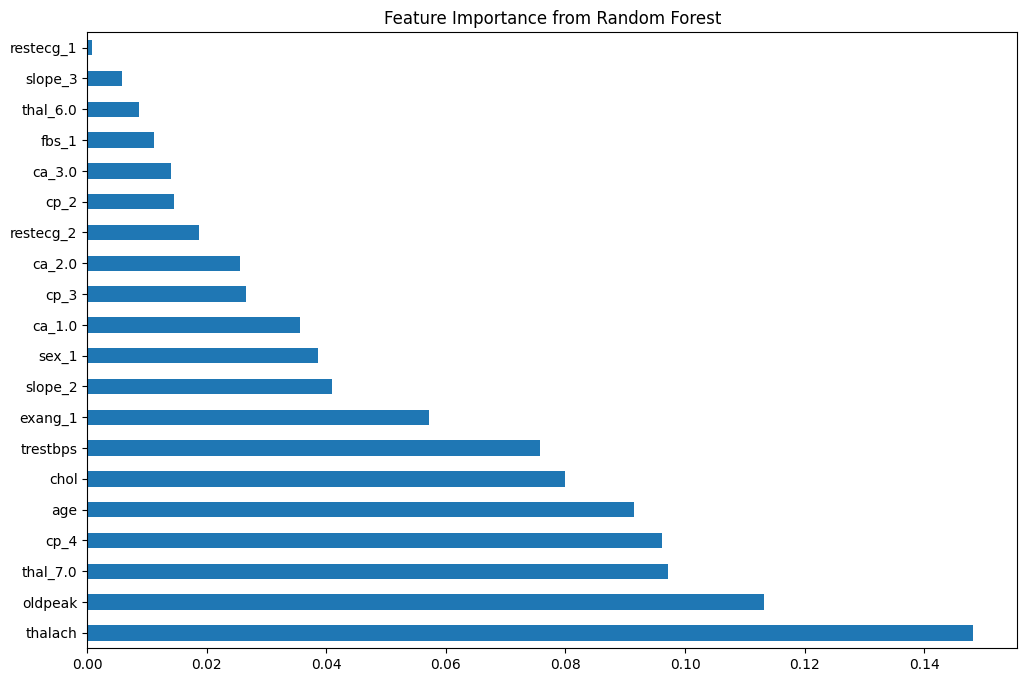

أهم 10 Features حسب Random Forest:
Index(['thalach', 'oldpeak', 'thal_7.0', 'cp_4', 'age', 'chol', 'trestbps',
       'exang_1', 'slope_2', 'sex_1'],
      dtype='object')


In [5]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# إنشاء Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# تدريب الـModel
rf.fit(X, y)

# الحصول على أهمية كل عمود
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# رسم أهمية كل عمود
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance from Random Forest')
plt.show()

# طباعة أهم 10 أعمدة
top_10_features = feature_importances.nlargest(10).index
print("أهم 10 Features حسب Random Forest:")
print(top_10_features)

In [6]:
from sklearn.feature_selection import RFE

# تحديد النموذج الأساسي (Base Estimator)
# هنستخدم Random Forest لأنه قوي في هذا النوع من المهام
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)

# تدريب الـRFE
rfe_selector.fit(X, y)

# الحصول على أهم الأعمدة التي تم اختيارها
selected_features_rfe = X.columns[rfe_selector.support_]

print("الأعمدة المختارة من RFE:")
print(selected_features_rfe)

# إنشاء DataFrame جديد بالـfeatures المختارة
X_rfe = X[selected_features_rfe]

الأعمدة المختارة من RFE:
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_4',
       'exang_1', 'slope_2', 'thal_7.0'],
      dtype='object')


In [9]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_4',
                     'exang_1', 'slope_2', 'thal_7.0']

In [10]:
# Create a new DataFrame with the selected features from RFE and the target column
df_selected = df[selected_features].copy()
df_selected['num'] = y

# Save the new DataFrame to a CSV file
df_selected.to_csv('../content/selected_features_data.csv', index=False)